### Pytorch custom datasets

In [111]:
import torch
from torch import nn
import os

print(torch.__version__)

2.7.1+cu118


In [112]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [113]:
# Download datasets
import requests
import zipfile
from pathlib import Path


# Set path to data folder
data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"{image_path} directory does not exist.")
    image_path.mkdir(exist_ok=True, parents=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak and sushi images")
        f.write(request.content)

    # Unzip data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref:
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


## Become one with data (data preparation)

In [114]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [115]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [116]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


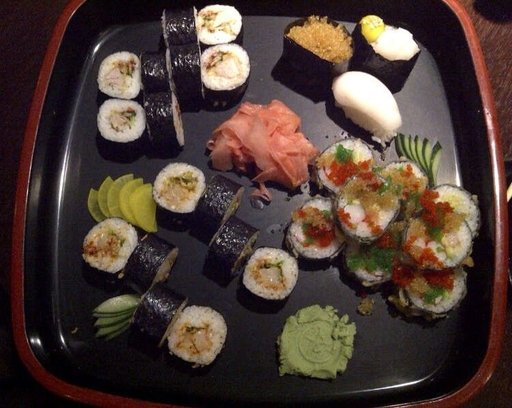

In [117]:
# Visualize images
import random
from PIL import Image

# Set seed
random.seed(42)

# Get all image path (* means "any colaration")
image_path_list = list(image_path.glob("*/*/*.jpg"))


# Get random image path
random_image_path = random.choice(image_path_list)


# Get image classes
image_class = random_image_path.parent.stem

# Open image
image = Image.open(random_image_path)
# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {image.height}") 
print(f"Image width: {image.width}")
image

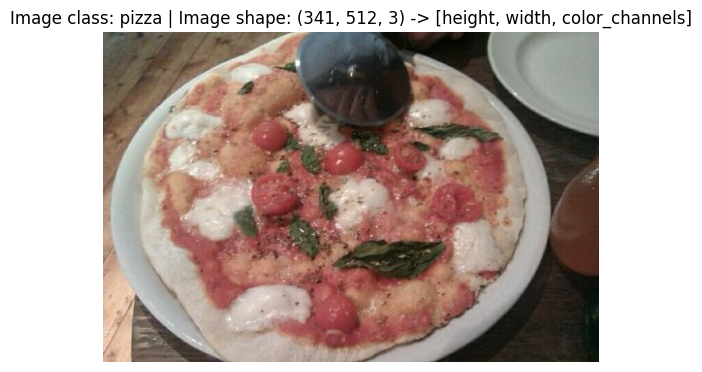

In [90]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.array(image)

plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis("off")
plt.show()

## Transforming data

In [91]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transform data with torchvision.transforms

In [98]:
data_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [100]:
img_as_tensor = torch.from_numpy(img_as_array)

In [ ]:
image_path_list

[PosixPath('data/pizza_steak_sushi/train/pizza/2576168.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2121603.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3441394.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2190018.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/739735.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3699992.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3109486.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/38349.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1089334.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2821048.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2885796.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2885050.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3338774.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2330965.jpg'),
 PosixPath(

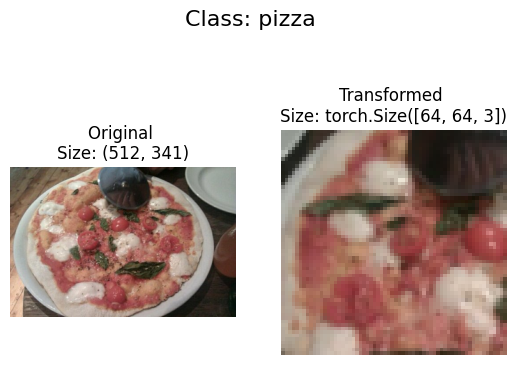

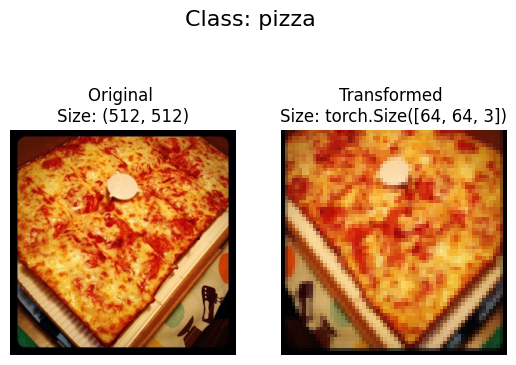

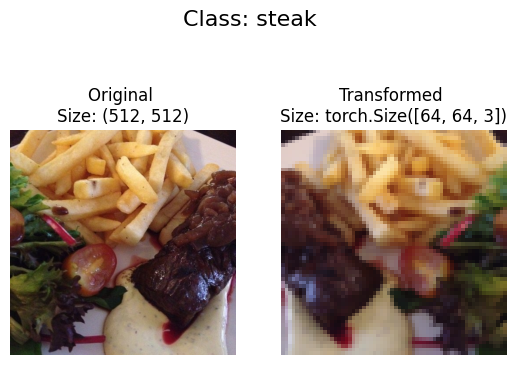

In [122]:
def plot_transformed_images(image_path, transform, n=3, seed=42):



    random.seed(seed)

    random_image_path = random.sample(image_path, k=n)

    for image_path in random_image_path:

        with Image.open(image_path) as img:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            transformed_image = transform(img).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path=image_path_list, transform=data_transform)

## Loading Image Data Using ImageFolder

In [ ]:
print("Hello")

Hello


In [131]:
from torchvision.transforms import transforms
transforms = transforms.Compose(
    transforms=[
        transforms.Resize(size=(64, 64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ]
)

In [6]:
from torchvision import datasets

train_data = datasets.ImageFolder(root="data/pizza_steak_sushi/train",
                                  transform=transforms,
                                  target_transform=None)


test_data = datasets.ImageFolder(root="data/pizza_steak_sushi/test",
                                 transform=transforms,)

print(f"Train data\n: {train_data}\n Test data: {test_data}")

Train data
: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [7]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [8]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [9]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [19]:
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [24]:
# image shape
img.shape

torch.Size([3, 64, 64])

In [27]:
# image shape after permite
img.permute(1, 2, 0).shape

torch.Size([64, 64, 3])

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


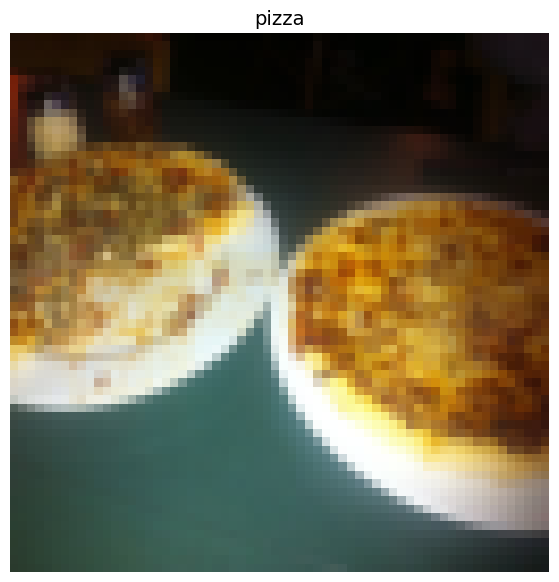

In [29]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## Turn data into DataLoader

In [33]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=True)


In [58]:
img, label = next(iter(train_dataloader))

In [59]:
img.shape, label

(torch.Size([1, 3, 64, 64]), tensor([2]))

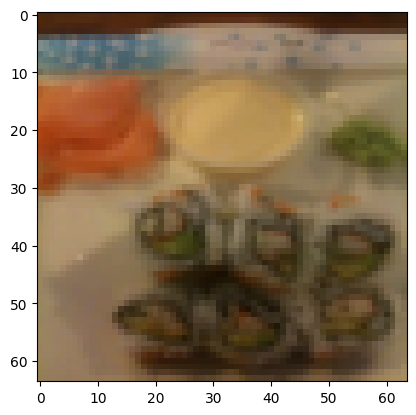

In [60]:
# remove one dimention from this vector
img = img.squeeze()
# permute this metrics
img = img.permute(1, 2, 0)
plt.imshow(img);

In [61]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## Loading Image Data with a Custom `Dataset`

In [67]:
import os
from pathlib import Path
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [64]:
train_data.classes, test_data.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [ ]:
# creating a custome function to get class names
def find_classes(directory: str) -> Tuple[List[str], Dict[str, str]]:

    classes = sorted(enrty.name for enrty in os.scandir(directory) if enrty.is_dir())
    pass

In [150]:
root_dir = Path("data/pizza_steak_sushi")

In [72]:
root_path = Path("data/pizza_steak_sushi/train")

for file in os.scandir(root_path):
    print(file.name)

pizza
steak
sushi


In [80]:
def find_classes(directory: str):

    """
    function to retrun classes and class to idx in dict
    """

    # 1. Get the class names by scanning the target directory
    classes = sorted(enrty.name for enrty in os.scandir(root_path) if enrty.is_dir())
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}")
    
    class_to_idx = {val:idx for idx, val in enumerate(classes)}

    return classes, class_to_idx


In [83]:
classes, class_to_idx = find_classes(directory=root_path)
classes, class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Create custome Dataset to replicated ImageFolder

In [ ]:
from PIL.Image import Image

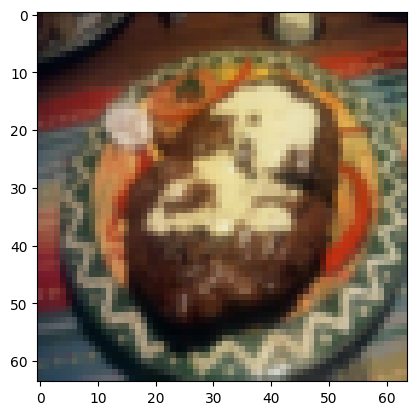

In [103]:
import PIL

img_squeezed = img.squeeze().permute(1, 2, 0)
plt.imshow(img_squeezed);

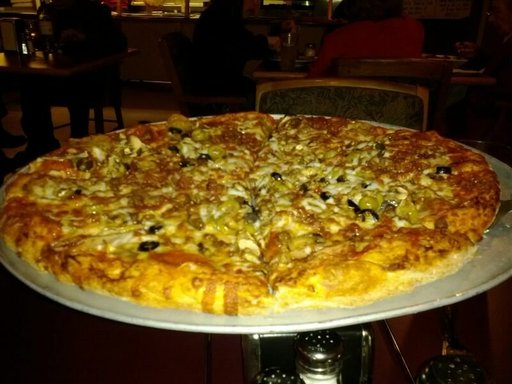

In [122]:
from PIL import Image
Image.open(image_path_list[0])

In [135]:
from torch.utils.data import Dataset
from PIL import Image
from pathlib import Path


class ImageFolderCustom(Dataset):
    
    def __init__(self, target_dir: str, transform=None):
        
        # Get all images paths
        self.paths = list(Path(target_dir).glob("*/*.jpg"))

        # setup transforms
        self.transform = transform

        # create classes and class_to_idx attributs
        self.classes, self.class_to_idx = find_classes(target_dir)

    def load_images(self, index: int) -> Image:
        # Open an image via path and return it.
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        "Retuns the total number of samples"
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Return one sample of data, data and labes (X, y)"

        img = self.load_images(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [136]:
custom_loader = ImageFolderCustom(target_dir=root_path, transform=transforms)

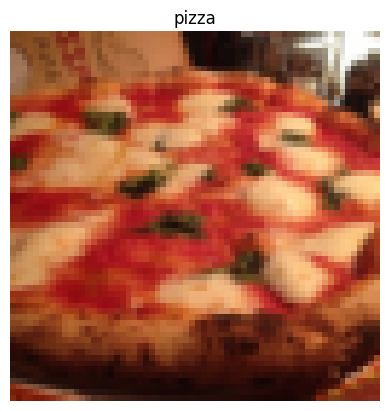

In [148]:
img, label = custom_loader.__getitem__(index=1)
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis("off");

In [182]:
# Augment train data
from torchvision.transforms import transforms

train_transforms = transforms.Compose(
    transforms=[
        transforms.Resize((64, 64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ]
)
# Test transforms
test_transforms = transforms.Compose(
    transforms=[
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ]
)

In [151]:
train_data_custom = ImageFolderCustom(target_dir=root_dir/"train",
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(target_dir=root_dir/"test",
                                     transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x24f37f23dd0>,
 <__main__.ImageFolderCustom at 0x24f2c18bb60>)

In [152]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [153]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [154]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

### Create a function to display random images

In [167]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

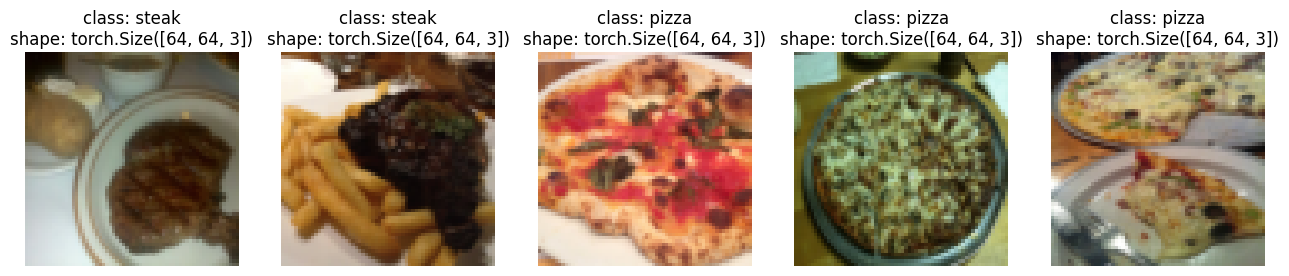

In [168]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data_custom, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


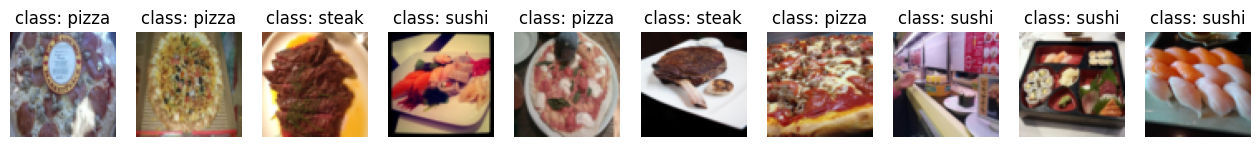

In [169]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

In [170]:
# Turn train and test custom Dataset's into DataLoader's
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x24f2fae5490>,
 <torch.utils.data.dataloader.DataLoader at 0x24f3af87050>)

In [171]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## Other forms of transforms (data augmentation)

In [184]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

In [178]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

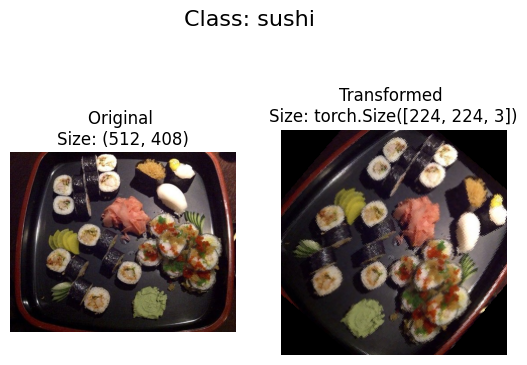

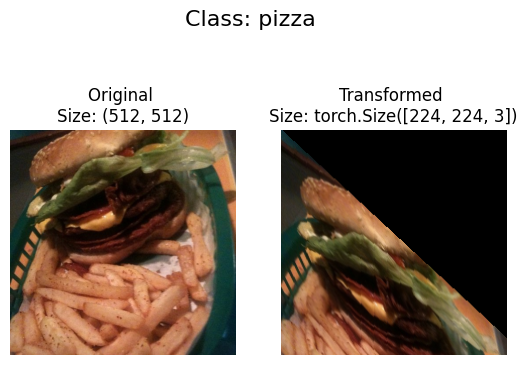

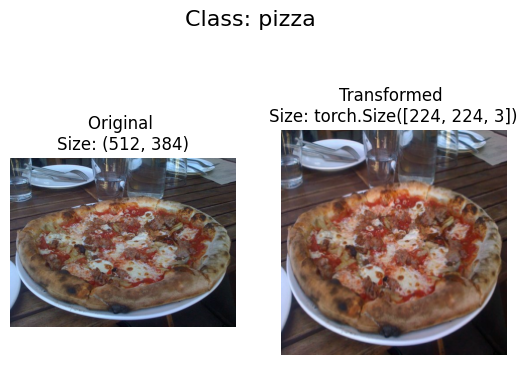

In [185]:
plot_transformed_images(image_path_list, 
                        transform=train_transforms, 
                        n=3)

## 7. Model 0: TinyVGG without data augmentation

#### `Creating transforms and loading data for model 0`

In [187]:
from torchvision.transforms import transforms

simple_transform = transforms.Compose(
    transforms=[
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ]
)

In [ ]:
# 1. Load and transform data